In [25]:
import pandas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
!head -n 1 dac/train.txt

0	1	1	5	0	1382	4	15	2	181	1	2		2	68fd1e64	80e26c9b	fb936136	7b4723c4	25c83c98	7e0ccccf	de7995b8	1f89b562	a73ee510	a8cd5504	b2cb9c98	37c9c164	2824a5f6	1adce6ef	8ba8b39a	891b62e7	e5ba7672	f54016b9	21ddcdc9	b1252a9d	07b5194c		3a171ecb	c5c50484	e8b83407	9727dd16


In [1]:
!wc -l dac/train.txt

45840617 dac/train.txt


In [11]:
# create spark session
from pyspark.sql import SparkSession
app_name = "final_notebook"
master = "local[*]"
spark = SparkSession\
        .builder\
        .appName(app_name)\
        .master(master)\
        .getOrCreate()
sc = spark.sparkContext

In [16]:
# read the train data, create dataframe and get a sample from it
train_df = spark.read.option('header', 'false').csv('dac/train.txt', sep='\t')
sample_df = train_df.sample(False, 0.1, 80)

In [18]:
# get descriptive statistics
sample_df.describe()

DataFrame[summary: string, _c0: string, _c1: string, _c2: string, _c3: string, _c4: string, _c5: string, _c6: string, _c7: string, _c8: string, _c9: string, _c10: string, _c11: string, _c12: string, _c13: string, _c14: string, _c15: string, _c16: string, _c17: string, _c18: string, _c19: string, _c20: string, _c21: string, _c22: string, _c23: string, _c24: string, _c25: string, _c26: string, _c27: string, _c28: string, _c29: string, _c30: string, _c31: string, _c32: string, _c33: string, _c34: string, _c35: string, _c36: string, _c37: string, _c38: string, _c39: string]

In [19]:
sample_df.show(10)

+---+----+---+----+----+-----+----+---+---+---+----+----+----+----+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+----+--------+--------+--------+--------+
|_c0| _c1|_c2| _c3| _c4|  _c5| _c6|_c7|_c8|_c9|_c10|_c11|_c12|_c13|    _c14|    _c15|    _c16|    _c17|    _c18|    _c19|    _c20|    _c21|    _c22|    _c23|    _c24|    _c25|    _c26|    _c27|    _c28|    _c29|    _c30|    _c31|    _c32|    _c33|    _c34|_c35|    _c36|    _c37|    _c38|    _c39|
+---+----+---+----+----+-----+----+---+---+---+----+----+----+----+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+----+--------+--------+--------+--------+
|  0|   0|  6|   6|   6|  421| 109|  1|  7|107|   0|   1|null|   6|05db9164|9b5fd12f|    null|    null|4cf

In [25]:
!head -n 1000000 dac/train.txt > dac/sample_train.txt

In [2]:
ctr = pandas.read_csv('sample_train.txt', delimiter='\t', header=None)

In [3]:
ctr.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,1000000.000000,576997.000000,1000000.000000,764946.000000,750884.000000,9.754640e+05,778260.000000,959166.000000,999338.000000,959166.000000,576997.000000,959166.000000,229943.000000,750884.000000
mean,0.254949,3.238400,93.965184,21.094269,6.954270,1.861653e+04,116.761653,14.592224,13.378894,105.450931,0.572658,2.507449,0.979991,7.630003
std,0.435833,8.944151,349.884675,344.010001,8.554014,6.768665e+04,456.056847,58.277459,32.345836,217.405401,0.679937,4.825370,6.003874,35.071487
min,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,2.000000,2.000000,8.290000e+02,8.000000,1.000000,2.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,1.000000,2.000000,5.000000,4.000000,2.548000e+03,33.000000,3.000000,8.000000,39.000000,0.000000,1.000000,0.000000,4.000000
75%,1.000000,3.000000,32.000000,14.000000,9.000000,1.016300e+04,102.000000,11.000000,20.000000,110.000000,1.000000,3.000000,0.000000,9.000000
max,1.000000,780.000000,18522.000000,65535.000000,507.000000,2.527030e+06,233523.000000,8807.000000,5064.000000,19327.000000,8.000000,147.000000,768.000000,6702.000000


In [4]:
# get the categorical variables.
ctr[ctr.columns[14:40]].head(5)

,14,15,16,17,18,19,20,21,22,23,...,30,31,32,33,34,35,36,37,38,39
0,68fd1e64,80e26c9b,fb936136,7b4723c4,25c83c98,7e0ccccf,de7995b8,1f89b562,a73ee510,a8cd5504,...,e5ba7672,f54016b9,21ddcdc9,b1252a9d,07b5194c,NaN,3a171ecb,c5c50484,e8b83407,9727dd16
1,68fd1e64,f0cf0024,6f67f7e5,41274cd7,25c83c98,fe6b92e5,922afcc0,0b153874,a73ee510,2b53e5fb,...,07c540c4,b04e4670,21ddcdc9,5840adea,60f6221e,NaN,3a171ecb,43f13e8b,e8b83407,731c3655
2,287e684f,0a519c5c,02cf9876,c18be181,25c83c98,7e0ccccf,c78204a1,0b153874,a73ee510,3b08e48b,...,8efede7f,3412118d,NaN,NaN,e587c466,ad3062eb,3a171ecb,3b183c5c,NaN,NaN
3,68fd1e64,2c16a946,a9a87e68,2e17d6f6,25c83c98,fe6b92e5,2e8a689b,0b153874,a73ee510,efea433b,...,1e88c74f,74ef3502,NaN,NaN,6b3a5ca6,NaN,3a171ecb,9117a34a,NaN,NaN
4,8cf07265,ae46a29d,c81688bb,f922efad,25c83c98,13718bbd,ad9fa255,0b153874,a73ee510,5282c137,...,1e88c74f,26b3c7a7,NaN,NaN,21c9516a,NaN,32c7478e,b34f3128,NaN,NaN


In [6]:
ctr[ctr.columns[14]].value_counts()

05db9164    500614
68fd1e64    167012
5a9ed9b0     83377
8cf07265     49595
be589b51     32745
5bfa8ab5     24029
87552397     17844
f473b8dc     14126
39af2607     10986
ae82ea21      8911
9a89b36c      7803
17f69355      6388
241546e0      5423
09ca0b81      4705
75ac2fe6      4164
41edac3d      3530
439a44a4      3427
7e5c2ff4      2919
b455c6d7      2531
1464facd      2475
fbc55dae      2187
291b7ba2      1890
2d4ea12b      1745
da4eff0f      1640
287e684f      1624
d4b08d58      1542
3c9d8785      1382
24eda356      1296
65aada8c      1099
46300ee3      1048
             ...  
6f0ba7a5         1
77526299         1
1a54ed6b         1
e3d40dac         1
f3459898         1
d0a193c9         1
07699494         1
cebe34a2         1
99ed6551         1
c9e1c8d4         1
5dd72143         1
410e760f         1
706df8ea         1
ea5b6bfd         1
c35810ad         1
d059587c         1
6e66d961         1
4f13e321         1
13d08368         1
09a0e225         1
cb20f252         1
28e8a150    

In [7]:
ctr[ctr.columns[15]].value_counts()

38a947a1    111079
1cfdf714     60554
207b2d81     49605
421b43cd     40898
38d50e09     38307
287130e0     35499
4f25e98b     30251
58e67aaf     25835
04e09220     22907
09e68b86     20888
a796837e     19068
2c16a946     17146
08d6d899     13376
e112a9de     13163
95e2d337     12700
80e26c9b     11497
78ccd99e     10973
f0cf0024     10916
d833535f     10099
ae46a29d      9461
b56822db      8953
b961056b      8831
89ddfee8      8784
e5fb1af3      8725
8947f767      8688
3f0d3f28      8627
6887a43c      8508
6e638bbc      8126
0468d672      7975
5dac953d      7318
             ...  
053c35c0        10
01d108a8        10
1e7938f6         9
a34cbcc9         9
2a0ca517         9
a92c2f11         9
0d4fc0f3         8
4ba8986c         7
83c8ca25         6
8b3f5f82         5
8f816992         5
a692227d         5
848d7b04         5
a4c63878         5
04236da6         4
13268a88         4
a775be34         4
51df5165         4
9afb12d1         3
6016d5bb         3
a4446fa2         3
8ef798c3    

In [14]:
# get the number of classes in each categorical variable
for i in range(14,40):
    print('column {}, unique classes {}'.format(i,ctr[ctr.columns[i]].unique().size))

column 14, unique classes 1261
column 15, unique classes 531
column 16, unique classes 321439
column 17, unique classes 120965
column 18, unique classes 267
column 19, unique classes 16
column 20, unique classes 10863
column 21, unique classes 563
column 22, unique classes 3
column 23, unique classes 30792
column 24, unique classes 4731
column 25, unique classes 268488
column 26, unique classes 3068
column 27, unique classes 26
column 28, unique classes 8934
column 29, unique classes 205924
column 30, unique classes 10
column 31, unique classes 3881
column 32, unique classes 1855
column 33, unique classes 4
column 34, unique classes 240748
column 35, unique classes 16
column 36, unique classes 15
column 37, unique classes 41283
column 38, unique classes 70
column 39, unique classes 30956


In [15]:
# number of missing values
for i in range(14,40):
    print('column {}, missing values {}'.format(i,ctr[ctr.columns[i]].isnull().sum()))

column 14, missing values 0
column 15, missing values 0
column 16, missing values 36345
column 17, missing values 36345
column 18, missing values 0
column 19, missing values 119344
column 20, missing values 0
column 21, missing values 0
column 22, missing values 0
column 23, missing values 0
column 24, missing values 0
column 25, missing values 36345
column 26, missing values 0
column 27, missing values 0
column 28, missing values 0
column 29, missing values 36345
column 30, missing values 0
column 31, missing values 0
column 32, missing values 483901
column 33, missing values 483901
column 34, missing values 36345
column 35, missing values 738959
column 36, missing values 0
column 37, missing values 36345
column 38, missing values 483901
column 39, missing values 483901


In [ ]:
ctr.plot(x=ctr.columns[0], y=[ctr.columns[1], ctr.columns[2], ctr.columns[3]], kind="bar")

In [72]:
count_ctr = ctr.groupby(ctr.columns[0]).count()
count_ctr

,1,2,3,4,5,6,7,8,9,10,...,30,31,32,33,34,35,36,37,38,39
0,,,,,,,,,,,,,,,,,,,,,
0,398288,745051,580476,566479,722893,550586,709879,744440,709879,398288,...,745051,745051,385876,385876,718708,188180,745051,718708,385876,385876
1,178709,254949,184470,184405,252571,227674,249287,254898,249287,178709,...,254949,254949,130223,130223,244947,72861,254949,244947,130223,130223


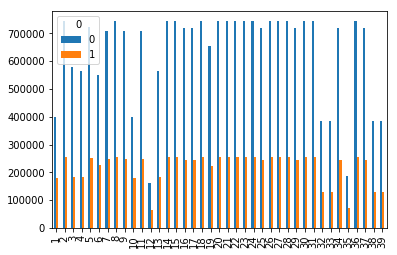

In [16]:
count_ctr.transpose().plot(kind='bar')

c:\users\dgorantla\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\dgorantla\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<Figure size 28800x28800 with 0 Axes>

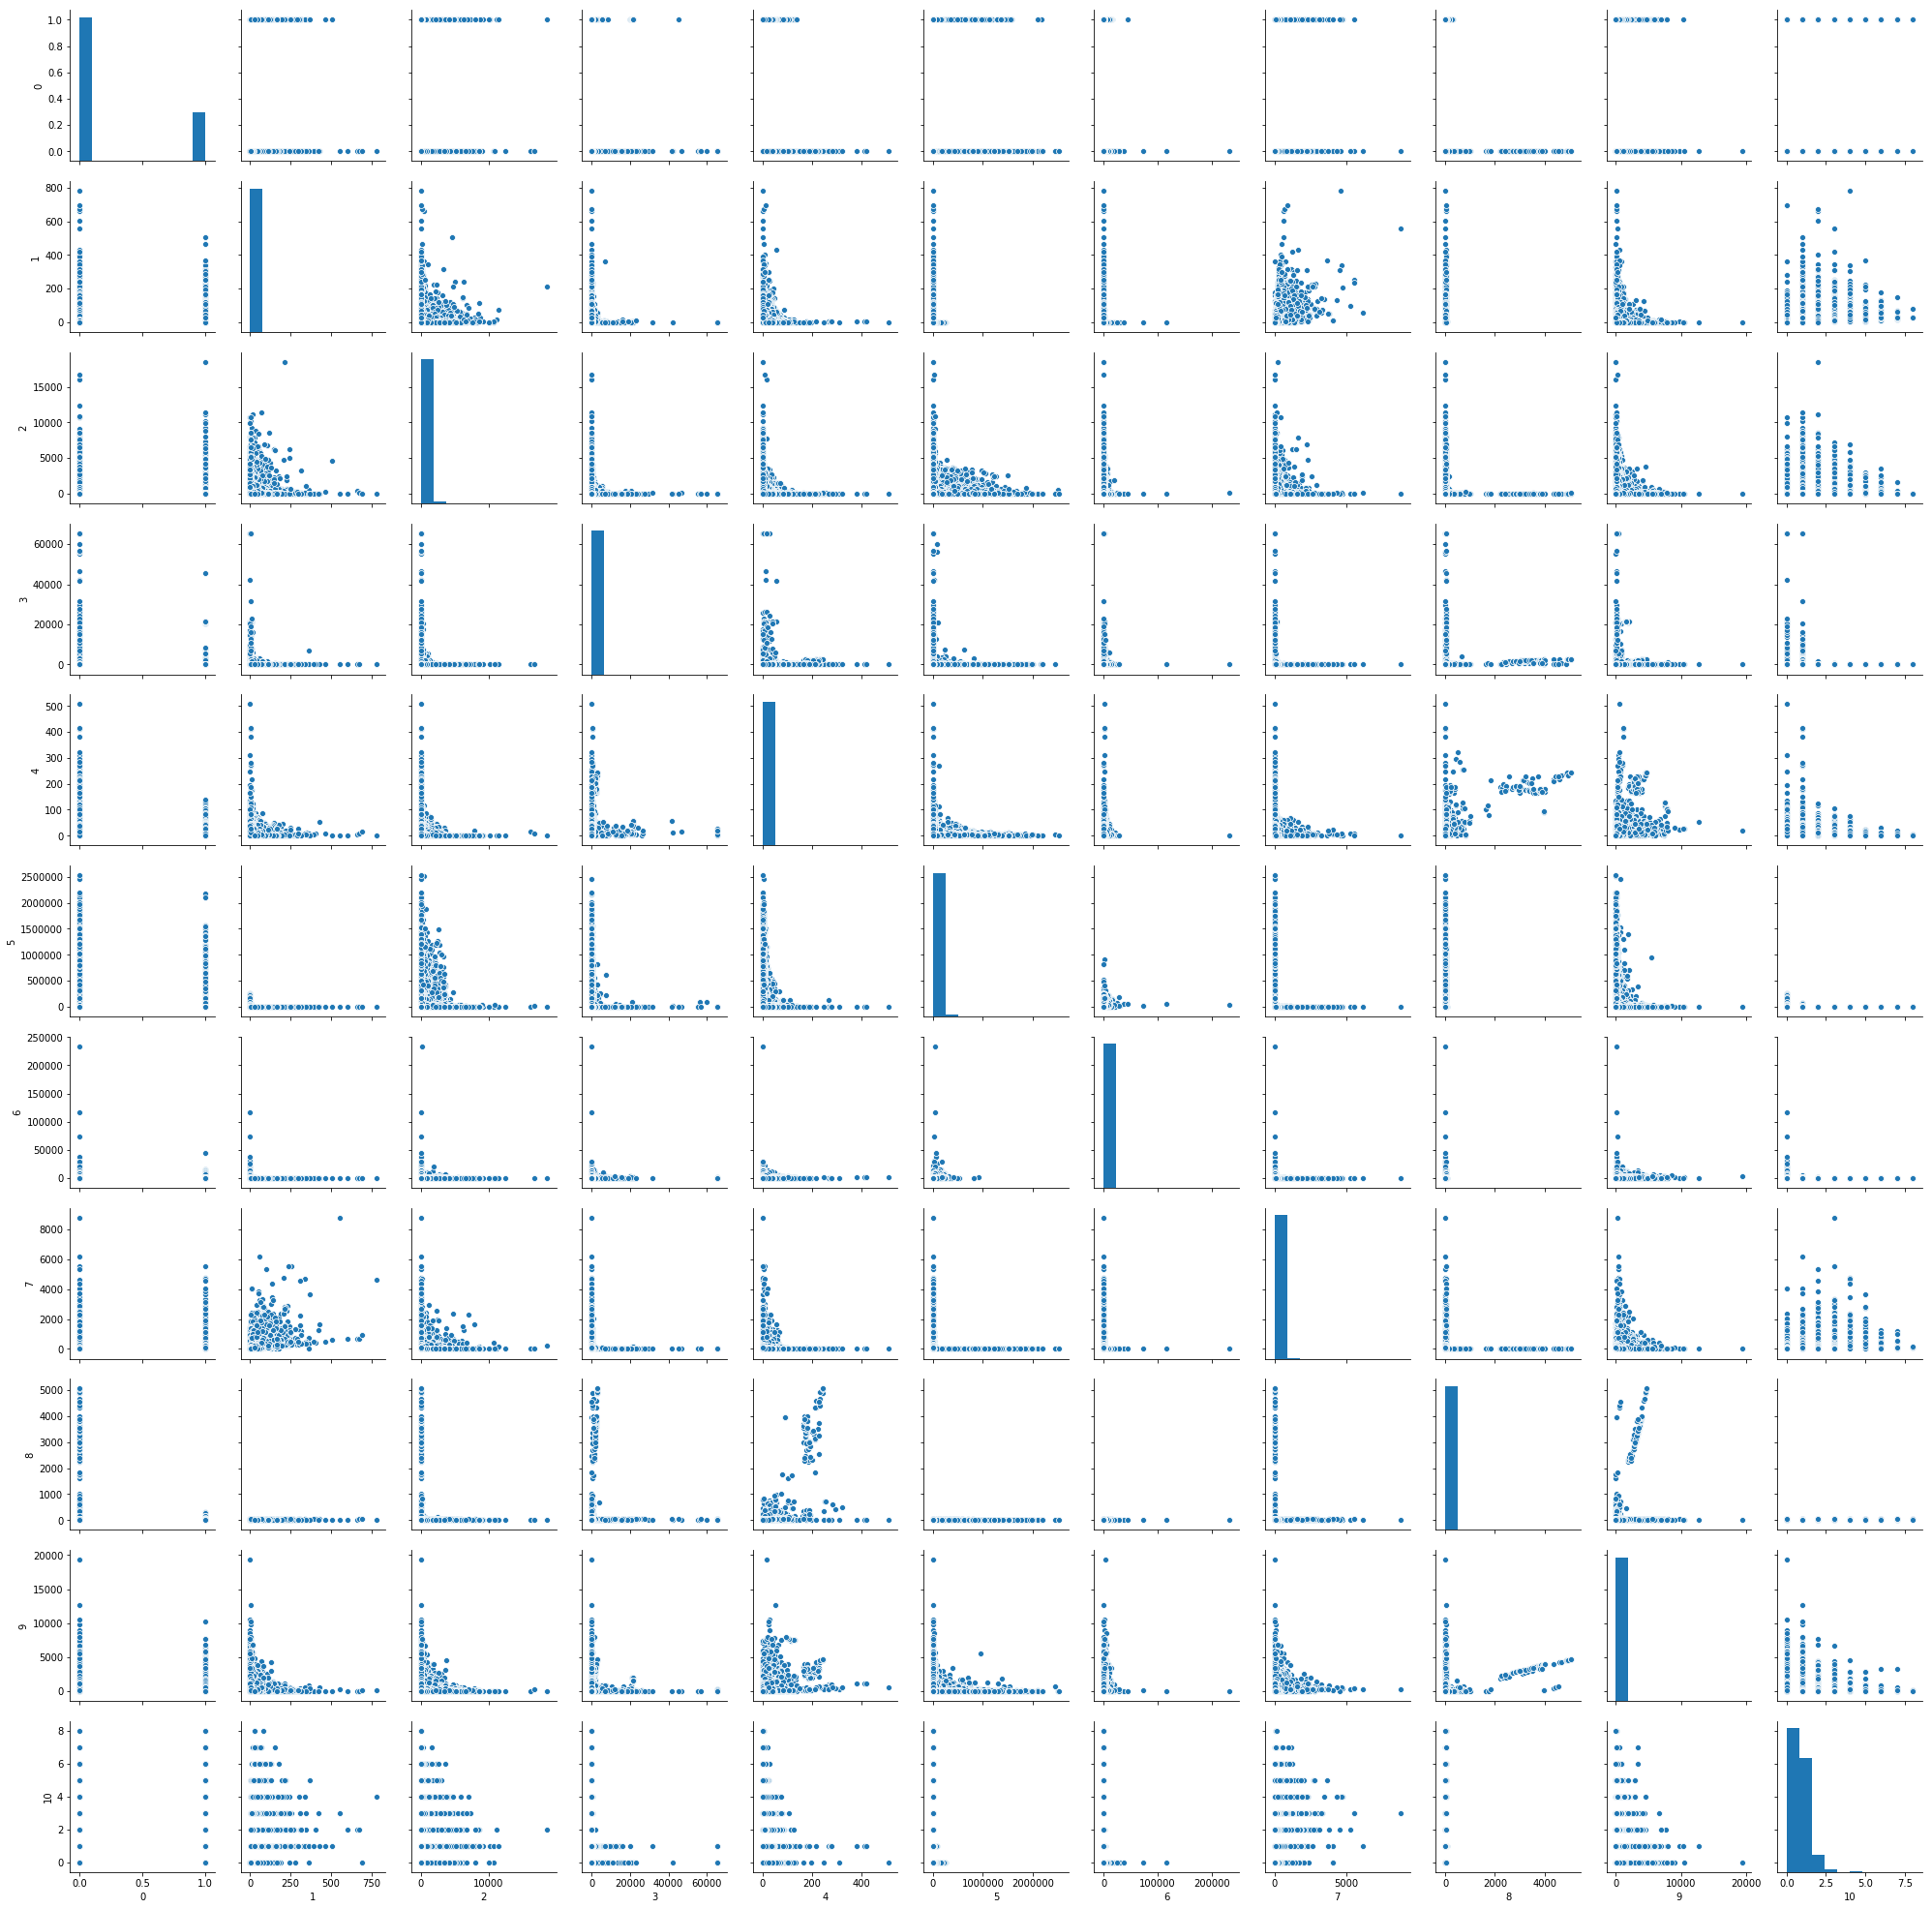

In [22]:
plt.figure(1, figsize=(400,400))
sns.pairplot(ctr[[ctr.columns[0],ctr.columns[1],ctr.columns[2],ctr.columns[3],ctr.columns[4],ctr.columns[5],ctr.columns[6],ctr.columns[7],ctr.columns[8],ctr.columns[9],ctr.columns[10]]])

In [23]:
ctr.corr(method='pearson')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.000000,0.098712,0.037108,-0.005824,-0.053335,-0.084255,-0.076072,0.092174,-0.019477,0.018566,0.179281,0.170407,0.084100,-0.037489
1,0.098712,1.000000,0.032245,0.009274,0.040187,-0.127324,-0.079393,0.456257,0.058791,0.022099,0.410315,0.239175,0.114548,-0.028211
2,0.037108,0.032245,1.000000,-0.005501,-0.090805,-0.005988,-0.012164,0.019311,-0.013403,-0.006107,0.029703,0.023363,-0.003690,-0.017780
3,-0.005824,0.009274,-0.005501,1.000000,0.053447,-0.001950,0.008952,0.000159,0.050716,0.018168,-0.007406,-0.003532,0.001267,0.070280
4,-0.053335,0.040187,-0.090805,0.053447,1.000000,-0.088981,0.005278,0.021869,0.369389,0.189736,0.077728,0.035299,0.011327,0.394299
5,-0.084255,-0.127324,-0.005988,-0.001950,-0.088981,1.000000,0.209890,-0.057038,-0.151631,-0.060613,-0.302043,-0.116215,-0.055886,-0.062573
6,-0.076072,-0.079393,-0.012164,0.008952,0.005278,0.209890,1.000000,-0.038997,0.015070,0.143003,-0.187705,-0.069636,-0.039819,0.054030
7,0.092174,0.456257,0.019311,0.000159,0.021869,-0.057038,-0.038997,1.000000,0.034943,0.226993,0.206714,0.686686,0.067441,-0.003772
8,-0.019477,0.058791,-0.013403,0.050716,0.369389,-0.151631,0.015070,0.034943,1.000000,0.203039,0.057915,0.065281,0.034257,0.824119
9,0.018566,0.022099,-0.006107,0.018168,0.189736,-0.060613,0.143003,0.226993,0.203039,1.000000,-0.017640,0.398551,0.024556,0.172287


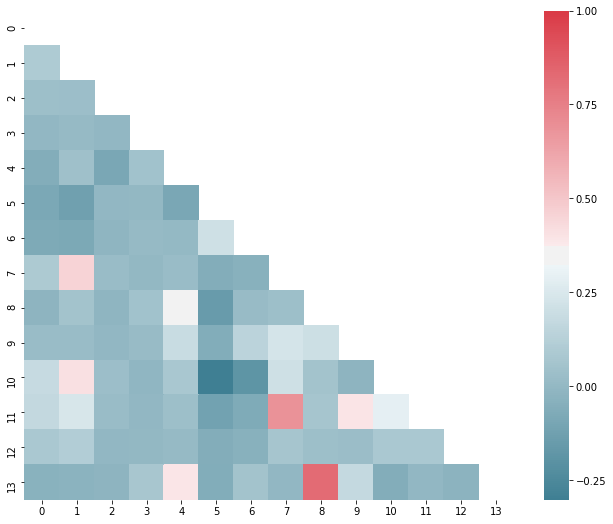

In [26]:
corr = ctr.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, square=True)

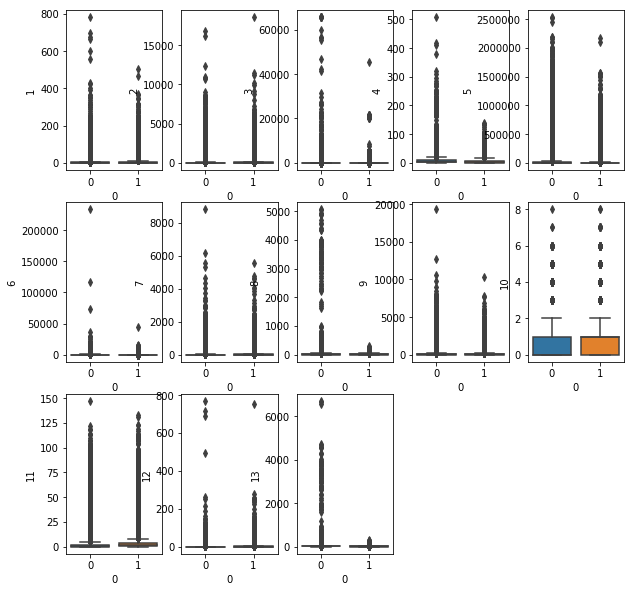

In [32]:
plt.figure(1, figsize=(10,10))
for i in range(1,14):
    plt.subplot(3,5,i)
    sns.boxplot(x=ctr.columns[0], y=ctr.columns[i], data=ctr)

In [53]:
# analyzing column 22 which ahs just 3 unique classes
ctr_22 = ctr.groupby([ctr.columns[22]]).count()
ctr_22

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
22,,,,,,,,,,,,,,,,,,,,,
7cc72ec2,101765,4736,101765,73636,58682,77809,25368,79921,101131,79921,...,101765,101765,49404,49404,97800,26832,101765,97800,49404,49404
a18233ea,175,49,175,140,131,175,92,170,175,170,...,175,175,75,75,165,47,175,165,75,75
a73ee510,898060,572212,898060,691170,692071,897480,752800,879075,898032,879075,...,898060,898060,466620,466620,865690,234162,898060,865690,466620,466620


In [56]:
df_with_dummies = pandas.get_dummies(ctr[ctr.columns[22]])

In [60]:
ctr_with_dummy = pandas.concat([ctr,df_with_dummies], axis=1)

In [61]:
ctr_with_dummy.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,7cc72ec2,a18233ea,a73ee510
0,0,1.0,1,5.0,0.0,1382.0,4.0,15.0,2.0,181.0,...,b1252a9d,07b5194c,NaN,3a171ecb,c5c50484,e8b83407,9727dd16,0,0,1
1,0,2.0,0,44.0,1.0,102.0,8.0,2.0,2.0,4.0,...,5840adea,60f6221e,NaN,3a171ecb,43f13e8b,e8b83407,731c3655,0,0,1
2,0,2.0,0,1.0,14.0,767.0,89.0,4.0,2.0,245.0,...,NaN,e587c466,ad3062eb,3a171ecb,3b183c5c,NaN,NaN,0,0,1
3,0,NaN,893,NaN,NaN,4392.0,NaN,0.0,0.0,0.0,...,NaN,6b3a5ca6,NaN,3a171ecb,9117a34a,NaN,NaN,0,0,1
4,0,3.0,-1,NaN,0.0,2.0,0.0,3.0,0.0,0.0,...,NaN,21c9516a,NaN,32c7478e,b34f3128,NaN,NaN,0,0,1


In [87]:
count_ctr_with_dummy = ctr_with_dummy[ctr_with_dummy['7cc72ec2'] == 1]
count_ctr_with_dummy.groupby(ctr_with_dummy.columns[0]).count()['7cc72ec2']

0
0    89175
1    12590
Name: 7cc72ec2, dtype: int64

In [88]:
count_ctr_with_dummy = ctr_with_dummy[ctr_with_dummy['a18233ea'] == 1]
count_ctr_with_dummy.groupby(ctr_with_dummy.columns[0]).count()['a18233ea']

0
0    157
1     18
Name: a18233ea, dtype: int64

In [89]:
count_ctr_with_dummy = ctr_with_dummy[ctr_with_dummy['a73ee510'] == 1]
count_ctr_with_dummy.groupby(ctr_with_dummy.columns[0]).count()['a73ee510']

0
0    655719
1    242341
Name: a73ee510, dtype: int64